<a href="https://colab.research.google.com/github/EleonoraBartolomucci/Fairness/blob/master/Esperimenti/MelaSecondoEsperimentoVersioneDefinitiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials
from google.colab import auth
import pandas as pd
import csv
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

sort = 'Relevance'

relevance = '1nwGbyk8q2S-0BkLcyFVqdK6emTooxHJv'  # FILE ID, got on google drive with condivision link
download = drive.CreateFile({'id': relevance})
download.GetContentFile('AllRestaurant_' + '%s' % sort + '_Analysis.csv')

dfr = pd.read_csv('AllRestaurant_' + '%s' % sort + '_Analysis.csv')

sort = 'Date'

date = '1Pb2It9WPid9Irjp6bRVgCF7B3Y5ARBjT'  # FILE ID, got on google drive with condivision link
download = drive.CreateFile({'id': date})
download.GetContentFile('AllRestaurant_' + '%s' % sort + '_Analysis.csv')

dfd = pd.read_csv('AllRestaurant_' + '%s' % sort + '_Analysis.csv')

In [28]:
american_male_relevance = dfr[(dfr['typology']=='American') & (dfr['gender']=='masculine') & (dfr['number']<=20)]
american_male_date = dfd[(dfd['typology']=='American')  & (dfd['gender']=='masculine') & (dfd['number']<=20)]
american_female_relevance = dfr[(dfr['typology']=='American') & (dfr['gender']=='feminine') & (dfr['number']<=20)]
american_female_date = dfd[(dfd['typology']=='American')  & (dfd['gender']=='feminine') & (dfd['number']<=20)]

tot_american_male_relevance = sum(american_male_relevance['number']) / len(american_male_relevance)
tot_american_male_date = sum(american_male_date['number']) / len(american_male_date)
tot_american_female_relevance = sum(american_female_relevance['number']) / len(american_female_relevance)
tot_american_female_date = sum(american_female_date['number']) / len(american_female_date)


#labels = ['OrdinamentoYelp', 'OrdinamentoData']
american_male = [tot_american_male_relevance, tot_american_male_date] 
american_female = [tot_american_female_relevance, tot_american_female_date]



In [29]:
asian_male_relevance = dfr[(dfr['typology']=='Japanese') & (dfr['gender']=='masculine') & (dfr['number']<=20)]
asian_male_date = dfd[(dfd['typology']=='Japanese')  & (dfd['gender']=='masculine') & (dfd['number']<=20)]
asian_female_relevance = dfr[(dfr['typology']=='Japanese') & (dfr['gender']=='feminine') & (dfr['number']<=20)]
asian_female_date = dfd[(dfd['typology']=='Japanese')  & (dfd['gender']=='feminine') & (dfd['number']<=20)]

tot_asian_male_relevance = sum(asian_male_relevance['number']) / len(asian_male_relevance)
tot_asian_male_date = sum(asian_male_date['number']) / len(asian_male_date)
tot_asian_female_relevance = sum(asian_female_relevance['number']) / len(asian_female_relevance)
tot_asian_female_date = sum(asian_female_date['number']) / len(asian_female_date)


#labels = ['OrdinamentoYelp', 'OrdinamentoData']
asian_male = [tot_asian_male_relevance, tot_asian_male_date] 
asian_female = [tot_asian_female_relevance, tot_asian_female_date]





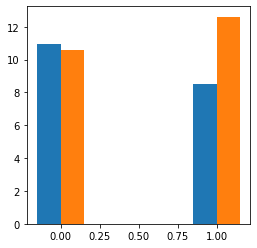

In [36]:
mexican_male_relevance = dfr[(dfr['typology']=='Mexican') & (dfr['gender']=='masculine') & (dfr['number']<=20)]
mexican_male_date = dfd[(dfd['typology']=='Mexican')  & (dfd['gender']=='masculine') & (dfd['number']<=20)]
mexican_female_relevance = dfr[(dfr['typology']=='Mexican') & (dfr['gender']=='feminine') & (dfr['number']<=20)]
mexican_female_date = dfd[(dfd['typology']=='Mexican')  & (dfd['gender']=='feminine') & (dfd['number']<=20)]

tot_mexican_male_relevance = sum(mexican_male_relevance['number']) / len(mexican_male_relevance)
tot_mexican_male_date = sum(mexican_male_date['number']) / len(mexican_male_date)
tot_mexican_female_relevance = sum(mexican_female_relevance['number']) / len(mexican_female_relevance)
tot_mexican_female_date = sum(mexican_female_date['number']) / len(mexican_female_date)


labels = ['OrdinamentoYelp', 'OrdinamentoData']
male = [tot_mexican_male_relevance, tot_mexican_male_date] 
female = [tot_mexican_female_relevance, tot_mexican_female_date]

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, male, width, label='male')
rects2 = ax.bar(x + width/2, female, width,label ='female')


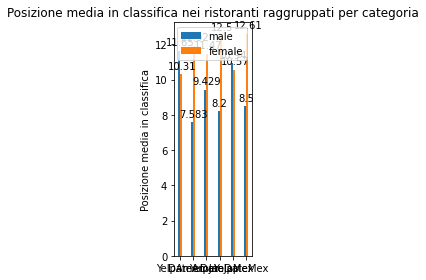

In [37]:
#==============COSTRUISCO IL GRAFICO========================


labels = ['YelpAmer', 'DateAmer', 'YelpJao', 'DateJap','YelpMex','DateMex']


male = [tot_american_male_relevance, tot_american_male_date,tot_asian_male_relevance, tot_asian_male_date,tot_mexican_male_relevance, tot_mexican_male_date]
female = [tot_american_female_relevance, tot_american_female_date,tot_asian_female_relevance, tot_asian_female_date,tot_mexican_female_relevance, tot_mexican_female_date]

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, male, width, label='male')
rects2 = ax.bar(x + width/2, female, width,label ='female')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Posizione media in classifica')
ax.set_title('Posizione media in classifica nei ristoranti raggruppati per categoria')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.4}'.format(height),
                    xy=(rect.get_x() + rect.get_width(), height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)


fig.tight_layout()

plt.show()


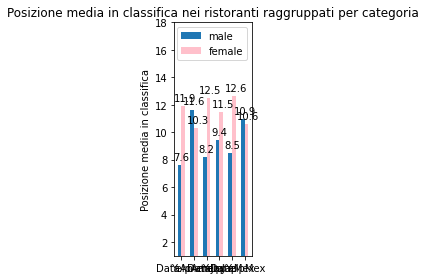

In [32]:
#==============COSTRUISCO IL GRAFICO========================


labels = ['DataAmer', 'YelpAmer', 'DataJap', 'YelpJap','DataMex','YelpMex']


male = [tot_american_male_date, tot_american_male_relevance,tot_asian_male_date, tot_asian_male_relevance,tot_mexican_male_date, tot_mexican_male_relevance]
female = [tot_american_female_date, tot_american_female_relevance,tot_asian_female_date, tot_asian_female_relevance,tot_mexican_female_date, tot_mexican_female_relevance]

x = np.arange(len(labels))  # the label locations
width = 0.29  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, male, width, label='male')
rects2 = ax.bar(x + width/2, female, width,label ='female',color='pink')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Posizione media in classifica')
ax.set_title('Posizione media in classifica nei ristoranti raggruppati per categoria')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim([1,18])
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.1f}'.format(height),
                    xy=(rect.get_x() + rect.get_width(), height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)


fig.tight_layout()

plt.show()

In [18]:
primo_masculine = len(dfr[(dfr['gender']=='masculine') & (dfr['number']==1)]) 
primo_feminine = len(dfr[(dfr['gender']=='feminine') & (dfr['number']==1)]) 

secondo_masculine = len(dfr[(dfr['gender']=='masculine') & (dfr['number']==2)]) 
secondo_feminine = len(dfr[(dfr['gender']=='feminine') & (dfr['number']==2)]) 

terzo_masculine = len(dfr[(dfr['gender']=='masculine') & (dfr['number']==3)]) 
terzo_feminine = len(dfr[(dfr['gender']=='feminine') & (dfr['number']==3)]) 

quarto_masculine = len(dfr[(dfr['gender']=='masculine') & (dfr['number']==4)]) 
quarto_feminine = len(dfr[(dfr['gender']=='feminine') & (dfr['number']==4)]) 

quinto_masculine = len(dfr[(dfr['gender']=='masculine') & (dfr['number']==5)]) 
quinto_feminine = len(dfr[(dfr['gender']=='feminine') & (dfr['number']==5)]) 

sesto_masculine = len(dfr[(dfr['gender']=='masculine') & (dfr['number']==6)]) 
sesto_feminine = len(dfr[(dfr['gender']=='feminine') & (dfr['number']==6)]) 

settimo_masculine = len(dfr[(dfr['gender']=='masculine') & (dfr['number']==7)]) 
settimo_feminine = len(dfr[(dfr['gender']=='feminine') & (dfr['number']==7)]) 

ottavo_masculine = len(dfr[(dfr['gender']=='masculine') & (dfr['number']==8)]) 
ottavo_feminine = len(dfr[(dfr['gender']=='feminine') & (dfr['number']==8)]) 

nono_masculine = len(dfr[(dfr['gender']=='masculine') & (dfr['number']==9)]) 
nono_feminine = len(dfr[(dfr['gender']=='feminine') & (dfr['number']==9)]) 

decimo_masculine = len(dfr[(dfr['gender']=='masculine') & (dfr['number']==10)]) 
decimo_feminine = len(dfr[(dfr['gender']=='feminine') & (dfr['number']==10)]) 

undicesimo_masculine = len(dfr[(dfr['gender']=='masculine') & (dfr['number']==11)]) 
undicesimo_feminine = len(dfr[(dfr['gender']=='feminine') & (dfr['number']==11)]) 

dodicesimo_masculine = len(dfr[(dfr['gender']=='masculine') & (dfr['number']==12)]) 
dodicesimo_feminine = len(dfr[(dfr['gender']=='feminine') & (dfr['number']==12)]) 

tredi_masculine = len(dfr[(dfr['gender']=='masculine') & (dfr['number']==13)]) 
tredi_feminine = len(dfr[(dfr['gender']=='feminine') & (dfr['number']==13)]) 

quattordi_masculine = len(dfr[(dfr['gender']=='masculine') & (dfr['number']==14)]) 
quattordi_feminine = len(dfr[(dfr['gender']=='feminine') & (dfr['number']==14)]) 

quindi_masculine = len(dfr[(dfr['gender']=='masculine') & (dfr['number']==15)]) 
quindi_feminine = len(dfr[(dfr['gender']=='feminine') & (dfr['number']==15)]) 

sedi_masculine = len(dfr[(dfr['gender']=='masculine') & (dfr['number']==16)]) 
sedi_feminine = len(dfr[(dfr['gender']=='feminine') & (dfr['number']==16)]) 

dicia_masculine = len(dfr[(dfr['gender']=='masculine') & (dfr['number']==17)]) 
dicia_feminine = len(dfr[(dfr['gender']=='feminine') & (dfr['number']==17)]) 

dicio_masculine = len(dfr[(dfr['gender']=='masculine') & (dfr['number']==18)]) 
dicio_feminine = len(dfr[(dfr['gender']=='feminine') & (dfr['number']==18)]) 

dician_masculine = len(dfr[(dfr['gender']=='masculine') & (dfr['number']==19)]) 
dician_feminine = len(dfr[(dfr['gender']=='feminine') & (dfr['number']==19)]) 

venti_masculine = len(dfr[(dfr['gender']=='masculine') & (dfr['number']==20)]) 
venti_feminine = len(dfr[(dfr['gender']=='feminine') & (dfr['number']==20)]) 

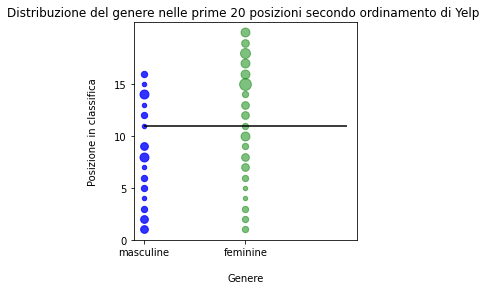

In [33]:
plt.subplot()
#fig, ax = plt.subplots()

#=======MASCULINE=======
plt.scatter(1, 1, s=primo_masculine*20, color= 'blue' , alpha=0.8, label='masculine')
plt.scatter(1, 2, s = secondo_masculine*20, color= 'blue',  alpha=0.8)
plt.scatter(1, 3, s=terzo_masculine*20,color= 'blue', alpha=0.8)
plt.scatter(1, 4, s=quarto_masculine*20, color= 'blue' , alpha=0.8)
plt.scatter(1, 5, s = quinto_masculine*20, color= 'blue',  alpha=0.8)
plt.scatter(1, 6, s=sesto_masculine*20,color= 'blue', alpha=0.8)
plt.scatter(1, 7, s=settimo_masculine*20, color= 'blue' , alpha=0.8)
plt.scatter(1, 8, s = ottavo_masculine*20, color= 'blue',  alpha=0.8)
plt.scatter(1, 9, s=nono_masculine*20,color= 'blue', alpha=0.8)
plt.scatter(1, 10, s=decimo_masculine*20, color= 'blue' , alpha=0.8)
plt.scatter(1, 11, s=undicesimo_masculine*20, color= 'blue' , alpha=0.8)
plt.scatter(1, 12, s = dodicesimo_masculine*20, color= 'blue',  alpha=0.8)
plt.scatter(1, 13, s=tredi_masculine*20,color= 'blue', alpha=0.8)
plt.scatter(1, 14, s=quattordi_masculine*20, color= 'blue' , alpha=0.8)
plt.scatter(1, 15, s = quindi_masculine*20, color= 'blue',  alpha=0.8)
plt.scatter(1, 16, s=sedi_masculine*20,color= 'blue', alpha=0.8)
plt.scatter(1, 17, s=dicia_masculine*20, color= 'blue' , alpha=0.8)
plt.scatter(1, 18, s = dicio_masculine*20, color= 'blue',  alpha=0.8)
plt.scatter(1, 19, s=dician_masculine*20,color= 'blue', alpha=0.8)
plt.scatter(1, 20, s=venti_masculine*20, color= 'blue' , alpha=0.8)


#====FEMININE=====
plt.scatter(2, 1, s=primo_feminine*20, color= 'green' , alpha=0.5, label='feminine')
plt.scatter(2, 2, s = secondo_feminine*20, color= 'green',  alpha=0.5)
plt.scatter(2, 3, s=terzo_feminine*20,color= 'green', alpha=0.5)
plt.scatter(2, 4, s=quarto_feminine*20, color= 'green' , alpha=0.5)
plt.scatter(2, 5, s = quinto_feminine*20, color= 'green',  alpha=0.5)
plt.scatter(2, 6, s=sesto_feminine*20,color= 'green', alpha=0.5)
plt.scatter(2, 7, s=settimo_feminine*20, color= 'green' , alpha=0.5)
plt.scatter(2, 8, s = ottavo_feminine*20, color= 'green',  alpha=0.5)
plt.scatter(2, 9, s=nono_feminine*20,color= 'green', alpha=0.5)
plt.scatter(2, 10, s=decimo_feminine*20, color= 'green' , alpha=0.5)
plt.scatter(2, 11, s=undicesimo_feminine*20, color= 'green' , alpha=0.5)
plt.scatter(2, 12, s = dodicesimo_feminine*20, color= 'green',  alpha=0.5)
plt.scatter(2, 13, s=tredi_feminine*20,color= 'green', alpha=0.5)
plt.scatter(2, 14, s=quattordi_feminine*20, color= 'green' , alpha=0.5)
plt.scatter(2, 15, s = quindi_feminine*20, color= 'green',  alpha=0.5)
plt.scatter(2, 16, s=sedi_feminine*20,color= 'green', alpha=0.5)
plt.scatter(2, 17, s=dicia_feminine*20, color= 'green' , alpha=0.5)
plt.scatter(2, 18, s = dicio_feminine*20, color= 'green',  alpha=0.5)
plt.scatter(2, 19, s=dician_feminine*20,color= 'green', alpha=0.5)
plt.scatter(2, 20, s=venti_feminine*20, color= 'green' , alpha=0.5)

#=======RIFINITURE========
plt.hlines(y=11, xmin=1, xmax=3)

plt.title('Distribuzione del genere nelle prime 20 posizioni secondo ordinamento di Yelp ')
plt.ylabel('Posizione in classifica', labelpad = 16)
plt.xlabel('Genere' , labelpad = 16)
#setta ogni quante y ti fa vedere
plt.yticks(np.arange(0, 20, 5.0))
plt.xticks(np.arange(1, 3, 1.0))
plt.xticks([1,2],['masculine','feminine'])
plt.show()


In [34]:
primo_masculine = len(dfd[(dfd['gender']=='masculine') & (dfd['number']==1)]) 
primo_feminine = len(dfd[(dfd['gender']=='feminine') & (dfd['number']==1)]) 

secondo_masculine = len(dfd[(dfd['gender']=='masculine') & (dfd['number']==2)]) 
secondo_feminine = len(dfd[(dfd['gender']=='feminine') & (dfd['number']==2)]) 

terzo_masculine = len(dfd[(dfd['gender']=='masculine') & (dfd['number']==3)]) 
terzo_feminine = len(dfd[(dfd['gender']=='feminine') & (dfd['number']==3)]) 

quarto_masculine = len(dfd[(dfd['gender']=='masculine') & (dfd['number']==4)]) 
quarto_feminine = len(dfd[(dfd['gender']=='feminine') & (dfd['number']==4)]) 

quinto_masculine = len(dfd[(dfd['gender']=='masculine') & (dfd['number']==5)]) 
quinto_feminine = len(dfd[(dfd['gender']=='feminine') & (dfd['number']==5)]) 

sesto_masculine = len(dfd[(dfd['gender']=='masculine') & (dfd['number']==6)]) 
sesto_feminine = len(dfd[(dfd['gender']=='feminine') & (dfd['number']==6)]) 

settimo_masculine = len(dfd[(dfd['gender']=='masculine') & (dfd['number']==7)]) 
settimo_feminine = len(dfd[(dfd['gender']=='feminine') & (dfd['number']==7)]) 

ottavo_masculine = len(dfd[(dfd['gender']=='masculine') & (dfd['number']==8)]) 
ottavo_feminine = len(dfd[(dfd['gender']=='feminine') & (dfd['number']==8)]) 

nono_masculine = len(dfd[(dfd['gender']=='masculine') & (dfd['number']==9)]) 
nono_feminine = len(dfd[(dfd['gender']=='feminine') & (dfd['number']==9)]) 

decimo_masculine = len(dfd[(dfd['gender']=='masculine') & (dfd['number']==10)]) 
decimo_feminine = len(dfd[(dfd['gender']=='feminine') & (dfd['number']==10)]) 

undicesimo_masculine = len(dfd[(dfd['gender']=='masculine') & (dfd['number']==11)]) 
undicesimo_feminine = len(dfd[(dfd['gender']=='feminine') & (dfd['number']==11)]) 

dodicesimo_masculine = len(dfd[(dfd['gender']=='masculine') & (dfd['number']==12)]) 
dodicesimo_feminine = len(dfd[(dfd['gender']=='feminine') & (dfd['number']==12)]) 

tredi_masculine = len(dfd[(dfd['gender']=='masculine') & (dfd['number']==13)]) 
tredi_feminine = len(dfd[(dfd['gender']=='feminine') & (dfd['number']==13)]) 

quattordi_masculine = len(dfd[(dfd['gender']=='masculine') & (dfd['number']==14)]) 
quattordi_feminine = len(dfd[(dfd['gender']=='feminine') & (dfd['number']==14)]) 

quindi_masculine = len(dfd[(dfd['gender']=='masculine') & (dfd['number']==15)]) 
quindi_feminine = len(dfd[(dfd['gender']=='feminine') & (dfd['number']==15)]) 

sedi_masculine = len(dfd[(dfd['gender']=='masculine') & (dfd['number']==16)]) 
sedi_feminine = len(dfd[(dfd['gender']=='feminine') & (dfd['number']==16)]) 

dicia_masculine = len(dfd[(dfd['gender']=='masculine') & (dfd['number']==17)]) 
dicia_feminine = len(dfd[(dfd['gender']=='feminine') & (dfd['number']==17)]) 

dicio_masculine = len(dfd[(dfd['gender']=='masculine') & (dfd['number']==18)]) 
dicio_feminine = len(dfd[(dfd['gender']=='feminine') & (dfd['number']==18)]) 

dician_masculine = len(dfd[(dfd['gender']=='masculine') & (dfd['number']==19)]) 
dician_feminine = len(dfd[(dfd['gender']=='feminine') & (dfd['number']==19)]) 

venti_masculine = len(dfd[(dfd['gender']=='masculine') & (dfd['number']==20)]) 
venti_feminine = len(dfd[(dfd['gender']=='feminine') & (dfd['number']==20)]) 

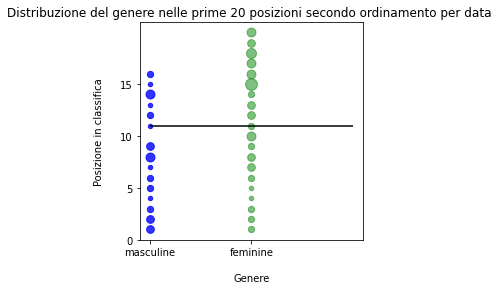

In [35]:
plt.subplot()
#fig, ax = plt.subplots()

#=======MASCULINE=======
plt.scatter(1, 1, s=primo_masculine*20, color= 'blue' , alpha=0.8, label='masculine')
plt.scatter(1, 2, s = secondo_masculine*20, color= 'blue',  alpha=0.8)
plt.scatter(1, 3, s=terzo_masculine*20,color= 'blue', alpha=0.8)
plt.scatter(1, 4, s=quarto_masculine*20, color= 'blue' , alpha=0.8)
plt.scatter(1, 5, s = quinto_masculine*20, color= 'blue',  alpha=0.8)
plt.scatter(1, 6, s=sesto_masculine*20,color= 'blue', alpha=0.8)
plt.scatter(1, 7, s=settimo_masculine*20, color= 'blue' , alpha=0.8)
plt.scatter(1, 8, s = ottavo_masculine*20, color= 'blue',  alpha=0.8)
plt.scatter(1, 9, s=nono_masculine*20,color= 'blue', alpha=0.8)
plt.scatter(1, 10, s=decimo_masculine*20, color= 'blue' , alpha=0.8)
plt.scatter(1, 11, s=undicesimo_masculine*20, color= 'blue' , alpha=0.8)
plt.scatter(1, 12, s = dodicesimo_masculine*20, color= 'blue',  alpha=0.8)
plt.scatter(1, 13, s=tredi_masculine*20,color= 'blue', alpha=0.8)
plt.scatter(1, 14, s=quattordi_masculine*20, color= 'blue' , alpha=0.8)
plt.scatter(1, 15, s = quindi_masculine*20, color= 'blue',  alpha=0.8)
plt.scatter(1, 16, s=sedi_masculine*20,color= 'blue', alpha=0.8)
plt.scatter(1, 17, s=dicia_masculine*20, color= 'blue' , alpha=0.8)
plt.scatter(1, 18, s = dicio_masculine*20, color= 'blue',  alpha=0.8)
plt.scatter(1, 19, s=dician_masculine*20,color= 'blue', alpha=0.8)
plt.scatter(1, 20, s=venti_masculine*20, color= 'blue' , alpha=0.8)


#====FEMININE=====
plt.scatter(2, 1, s=primo_feminine*20, color= 'green' , alpha=0.5, label='feminine')
plt.scatter(2, 2, s = secondo_feminine*20, color= 'green',  alpha=0.5)
plt.scatter(2, 3, s=terzo_feminine*20,color= 'green', alpha=0.5)
plt.scatter(2, 4, s=quarto_feminine*20, color= 'green' , alpha=0.5)
plt.scatter(2, 5, s = quinto_feminine*20, color= 'green',  alpha=0.5)
plt.scatter(2, 6, s=sesto_feminine*20,color= 'green', alpha=0.5)
plt.scatter(2, 7, s=settimo_feminine*20, color= 'green' , alpha=0.5)
plt.scatter(2, 8, s = ottavo_feminine*20, color= 'green',  alpha=0.5)
plt.scatter(2, 9, s=nono_feminine*20,color= 'green', alpha=0.5)
plt.scatter(2, 10, s=decimo_feminine*20, color= 'green' , alpha=0.5)
plt.scatter(2, 11, s=undicesimo_feminine*20, color= 'green' , alpha=0.5)
plt.scatter(2, 12, s = dodicesimo_feminine*20, color= 'green',  alpha=0.5)
plt.scatter(2, 13, s=tredi_feminine*20,color= 'green', alpha=0.5)
plt.scatter(2, 14, s=quattordi_feminine*20, color= 'green' , alpha=0.5)
plt.scatter(2, 15, s = quindi_feminine*20, color= 'green',  alpha=0.5)
plt.scatter(2, 16, s=sedi_feminine*20,color= 'green', alpha=0.5)
plt.scatter(2, 17, s=dicia_feminine*20, color= 'green' , alpha=0.5)
plt.scatter(2, 18, s = dicio_feminine*20, color= 'green',  alpha=0.5)
plt.scatter(2, 19, s=dician_feminine*20,color= 'green', alpha=0.5)
plt.scatter(2, 20, s=venti_feminine*20, color= 'green' , alpha=0.5)

#=======RIFINITURE========
plt.hlines(y=11, xmin=1, xmax=3)

plt.title('Distribuzione del genere nelle prime 20 posizioni secondo ordinamento per data ')
plt.ylabel('Posizione in classifica', labelpad = 16)
plt.xlabel('Genere' , labelpad = 16)
#setta ogni quante y ti fa vedere
plt.yticks(np.arange(0, 20, 5.0))
plt.xticks(np.arange(1, 3, 1.0))
plt.xticks([1,2],['masculine','feminine'])
#matplotlib.rcParams['figure.figsize'] = (4,4)
plt.show()
